# Wannier functions for polyacetylene in the Hückel model

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def hamitonian(alpha1,alpha2,beta1,beta2,k):
    ham=np.zeros((2,2),dtype=complex)
    ham[0,0]=alpha1
    ham[1,1]=alpha2
    ham[0,1]=beta1*np.exp(1j*k)+beta2*np.exp(-1j*k)
    ham[1,0]=np.conj(ham[0,1])
    return ham

In [32]:
alpha1,alpha2=1.0,1.0
beta1,beta2=-1.1,-0.9

In [33]:
N=100000

In [34]:
uA=np.zeros((N+1,2),dtype=complex)
uB=np.zeros((N+1,2),dtype=complex)
eps=np.zeros((N+1,2))
kpt=np.linspace(-np.pi/2,np.pi/2,N+1)

In [35]:
for ik,k in enumerate(kpt):
    H=hamitonian(alpha1,alpha2,beta1,beta2,k)
    e,v=np.linalg.eigh(H)
    eps[ik,:]=e
    uA[ik,:]=v[0,:]*np.exp(-1j*np.angle(v[0,:]))#*np.exp(-1j*k)
    uB[ik,:]=v[1,:]*np.exp(-1j*np.angle(v[0,:]))#*np.exp(-1j*k)

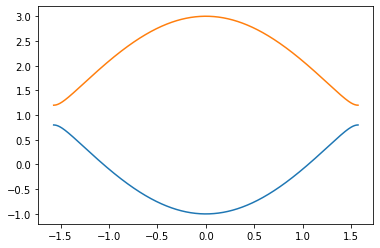

In [36]:
plt.plot(kpt,eps[:,0])
plt.plot(kpt,eps[:,1])
plt.show()

In [37]:
state=0

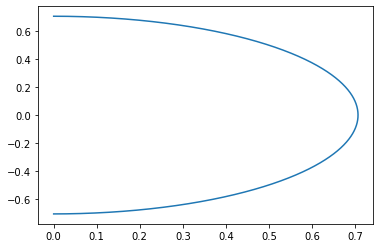

In [38]:
plt.plot(np.real(uB[:,state]),np.imag(uB[:,state]))
plt.show()

In [39]:
psiA=uA[:-1,state]
psiB=uB[:-1,state]*np.exp(1j*kpt[:-1])

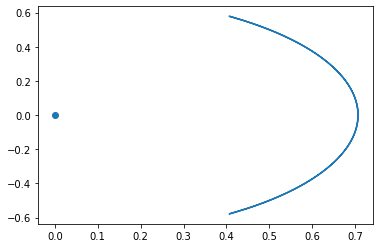

In [40]:
plt.plot(np.real(psiB),np.imag(psiB))
plt.scatter(0.0,0.0)
plt.show()

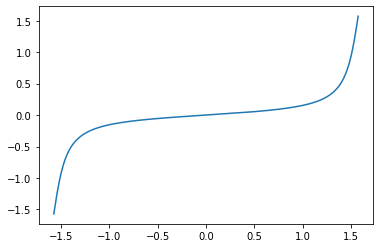

In [16]:
plt.plot(kpt,np.angle(uB[:,state]))
plt.show()

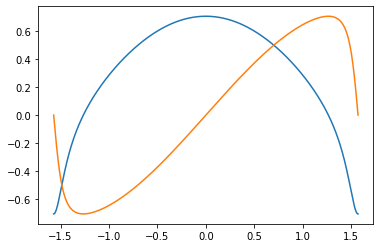

In [17]:
plt.plot(kpt[:-1],np.real(psiB))
plt.plot(kpt[:-1],np.imag(psiB))
plt.show()

In [18]:
wA=np.fft.ifft(psiA*np.exp(-1*1j*kpt[:-1]*N/2))
wB=np.fft.ifft(psiB*np.exp(-1*1j*kpt[:-1]*N/2))

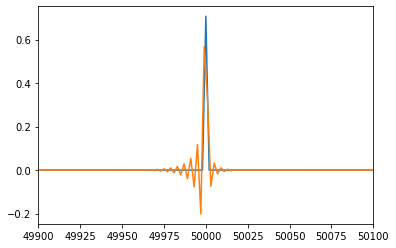

In [19]:
x=np.arange(0,N)*2
plt.plot(x,np.real(wA*np.exp(1j*np.pi/2*x)))
plt.plot(x+1,np.real(wB*np.exp(1j*np.pi/2*x)))
plt.xlim(N/2-100,N/2+100)
plt.show()

In [20]:
np.vdot(wA,wA),np.vdot(wB,wB)

((0.5000000000000002+0j), (0.5000000000000001+0j))

In [21]:
M=np.zeros(N,dtype=complex)
for ik in range(N):
    M[ik]=np.conj(uA[ik,state])*uA[ik+1,state]+np.conj(uB[ik,state])*uB[ik+1,state]

In [22]:
Macc=np.zeros(N,dtype=complex)
Macc[0]=M[0]
for ik in range(1,N):
    Macc[ik]=M[ik]*Macc[ik-1]

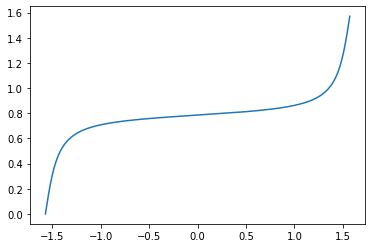

In [23]:
plt.plot(kpt[:-1],np.angle(Macc))
plt.show()

In [24]:
phase=-np.angle(Macc[-1])
print("Pi/{}".format(np.pi/phase))

Pi/-2.0000000000000107


In [25]:
uAML=np.zeros(N+1,dtype=complex)
uBML=np.zeros(N+1,dtype=complex)

for ik in range(N):
    uAML[ik]=uA[ik,state]*np.exp(-1j*(phase*ik/N+np.angle(Macc[ik])))
    uBML[ik]=uB[ik,state]*np.exp(-1j*(phase*ik/N+np.angle(Macc[ik])))
    
uAML[N]=uA[N,state]
uBML[N]=uB[N,state]


In [26]:
MML=np.zeros(N,dtype=complex)
MaccML=np.zeros(N,dtype=complex)

for ik in range(N):
    MML[ik]=np.conj(uAML[ik])*uAML[ik+1]+np.conj(uBML[ik])*uBML[ik+1]
    
MaccML[0]=1
for ik in range(1,N):
    MaccML[ik]=MML[ik]*MaccML[ik-1]

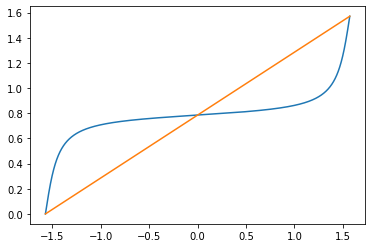

In [27]:
plt.plot(kpt[:-1],np.angle(Macc))
plt.plot(kpt[:-1],np.angle(MaccML))
plt.show()

In [28]:
psiAML=uAML[:-1]
psiBML=uBML[:-1]*np.exp(1j*kpt[:-1])

In [29]:
wAML=np.fft.ifft(psiAML*np.exp(-1*1j*kpt[:-1]*N/2))
wBML=np.fft.ifft(psiBML*np.exp(-1*1j*kpt[:-1]*N/2))

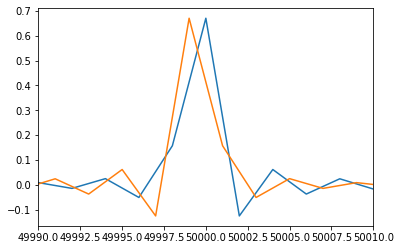

In [30]:
x=np.arange(0,N)*2
plt.plot(x,np.real(wAML*np.exp(1j*np.pi/2*x)))
plt.plot(x+1,np.real(wBML*np.exp(1j*np.pi/2*x)))
plt.xlim(N/2-10,N/2+10)
plt.show()

In [31]:
np.vdot(wAML,wAML),np.vdot(wBML,wBML)

((0.5+0j), (0.49999999999999994+0j))